In [2]:
# load Article_top10_Data.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Article_top_Data.csv', index_col=False)
df.head()

,Unnamed: 0,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,ReceiptRowNumber,Time,ArticleNumber,ArticleName,Quantity,Month,Day,Hour
0,4,2022-01-03 09:21:14,1001,1,296,5,09:21:14,419727,"GL H-Milch 3,5% 1L VLOG",1.0,1,0,9
1,6,2022-01-03 09:21:14,1001,1,296,7,09:21:14,999999998025,Pfandartikel (Tandem) - EW,1.0,1,0,9
2,7,2022-01-03 09:21:14,1001,1,296,8,09:21:14,435066,Schlaufentragetasche ST,1.0,1,0,9
3,19,2022-01-03 09:25:34,1001,1,300,1,09:25:34,421791,BO-Laugenbreze 1ST,1.0,1,0,9
4,20,2022-01-03 09:25:34,1001,1,300,2,09:25:34,421791,BO-Laugenbreze 1ST,1.0,1,0,9


In [3]:
time_set = set()
for timeseries in df['Time'].items():
    time_set.add(timeseries[1].split(":")[0])
print(time_set)    


{'10', '19', '09', '12', '08', '15', '13', '17', '06', '20', '18', '07', '14', '11', '05', '16'}


In [4]:
# Schlaufentragetasche ST
gurken = df[df['ArticleName'] == 'Gurken ST'].reset_index()


# group by date, calculate quantity
gurken['Date'] = gurken['Date'].map(lambda x: 1 if len(pd.bdate_range(x, x)) else 0 )

# group by time, calculate quantity
gurken['Time'] = gurken['Hour'].map(lambda x: 0 if int(x)>=5 and int(x)<=8
                                            else 1 if int(x)>=9 and int(x)<=12
                                            else 2 if int(x)>=13 and int(x)<=16
                                            else 3)

gurken.head()

,index,Unnamed: 0,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,ReceiptRowNumber,Time,ArticleNumber,ArticleName,Quantity,Month,Day,Hour
0,16,120,1,1001,2,4,3,2,46150,Gurken ST,2.0,1,0,16
1,22,148,1,1001,2,4,31,2,46150,Gurken ST,1.0,1,0,16
2,67,518,1,1001,2,51,9,3,46150,Gurken ST,1.0,1,0,17
3,84,650,1,1001,2,68,8,3,46150,Gurken ST,2.0,1,0,17
4,93,699,1,1001,2,75,6,3,46150,Gurken ST,1.0,1,0,17


In [5]:
# average
gurken_series = gurken.groupby(['Date', 'Time'])['Quantity'].sum()
print(gurken_series)
for gurken_item in gurken_series.items():
    gurken_item = list(gurken_item)
    print(gurken[(gurken['Date']==gurken_item[0][0]) & (gurken['Time']==gurken_item[0][1])].shape[0])
    gurken_item[1] /= gurken[(gurken['Date']==gurken_item[0][0]) & (gurken['Time']==gurken_item[0][1])].shape[0]
    print(gurken_item)
    # Schlaufen_item[1] /= gurken[gurken['Date'] == Schlaufen_item[0]].shape[0]
    # print(Schlaufen_item)

Date  Time
0     0        6062.0
      1       27012.0
      2       21422.0
      3       14035.0
1     0       16086.0
      1       73825.0
      2       74824.0
      3       56048.0
Name: Quantity, dtype: float64
4963
[(0, 0), 1.221438645980254]
22770
[(0, 1), 1.1862977602108038]
18064
[(0, 2), 1.1858945969884853]
12014
[(0, 3), 1.1682204095222242]
13474
[(1, 0), 1.193854831527386]
63249
[(1, 1), 1.167212129836045]
65681
[(1, 2), 1.139203118101125]
49882
[(1, 3), 1.1236117236678562]


In [6]:
dim_1 = []
dim_2 = []
dim_3 = []
dim_4 = []
dim_5 = []
dim_6 = []
dim_7 = []
dim_8 = []
article_list = []

for article_name in list(df['ArticleName'].unique()):
    print('------------------------------')
    print("this is the data for article : ", article_name)
    article_list.append(article_name)
    article = df[df['ArticleName'] == article_name].reset_index()

    # group by date, calculate quantity
    article['Date'] = article['Date'].map(lambda x: 1 if len(pd.bdate_range(x, x)) else 0 )
    
    # group by time, calculate quantity
    article['Time'] = article['Hour'].map(lambda x: 0 if int(x)>=5 and int(x)<=8
                                            else 1 if int(x)>=9 and int(x)<=12
                                            else 2 if int(x)>=13 and int(x)<=16
                                            else 3)

    # average
    article_series = article.groupby(['Date', 'Time'])['Quantity'].sum()
    for article_item in article_series.items():
        article_item = list(article_item)
        article_item[1] /= article[(article['Date']==article_item[0][0]) & (article['Time']==article_item[0][1])].shape[0]
        print(article_item)

        dim_1.append(article_item[1]) if article_item[0] == (0,0) \
            else dim_2.append(article_item[1]) if article_item[0]==(0,1) \
            else dim_3.append(article_item[1]) if article_item[0]==(0,2) \
            else dim_4.append(article_item[1]) if article_item[0]==(0,3) \
            else dim_5.append(article_item[1]) if article_item[0]==(1,0) \
            else dim_6.append(article_item[1]) if article_item[0]==(1,1) \
            else dim_7.append(article_item[1]) if article_item[0]==(1,2) \
            else dim_8.append(article_item[1])

------------------------------
this is the data for article :  GL H-Milch 3,5% 1L VLOG
[(0, 0), 1.9276315789473684]
[(0, 1), 1.5886683738796414]
[(0, 2), 1.4487120515179392]
[(0, 3), 1.4202375582619156]
[(1, 0), 1.6296140939597314]
[(1, 1), 1.4182491028708133]
[(1, 2), 1.4234532223808363]
[(1, 3), 1.3213494907202383]
------------------------------
this is the data for article :  Pfandartikel (Tandem) - EW
[(0, 0), 1.2227900402305099]
[(0, 1), 1.2467452417641913]
[(0, 2), 1.2273187560670713]
[(0, 3), 1.1815367479648162]
[(1, 0), 1.1321373399702876]
[(1, 1), 1.2010753296734393]
[(1, 2), 1.1896855098741503]
[(1, 3), 1.1975850756347128]
------------------------------
this is the data for article :  Schlaufentragetasche ST
[(0, 0), 1.08]
[(0, 1), 1.049865037647393]
[(0, 2), 1.0224164524421593]
[(0, 3), 1.017942312059959]
[(1, 0), 1.0612612612612613]
[(1, 1), 1.0335402910548275]
[(1, 2), 1.021699063721033]
[(1, 3), 1.0193393893646372]
------------------------------
this is the data for artic

data after pca [[-0.52717658 -0.39991416]
 [-1.41457706  0.12028908]
 [-1.87632028  0.09387079]
 [-0.10915016 -0.01673391]
 [-1.22155726  0.00959521]
 [-1.9095385   0.12161063]
 [-0.49367422 -0.42962618]
 [-1.93013642  0.15376791]
 [-1.49301463  0.07157532]
 [ 4.27495197  0.01693782]
 [-1.69329191 -0.02794975]
 [-0.29320861 -0.04763731]
 [ 4.38345722 -0.05426167]
 [-2.70105803  0.20260241]
 [-1.98022038  0.15885955]
 [ 1.24214185 -0.22860697]
 [ 0.18712025 -0.10253074]
 [ 0.55727163 -0.14835082]
 [ 3.14737111  0.04183049]
 [ 3.85061     0.46467229]]


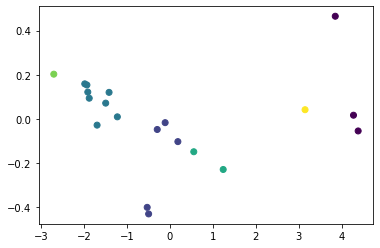

140.01148860609612

In [7]:
from sklearn.cluster import KMeans
data_array = list(zip(dim_1, dim_2, dim_3, dim_4, dim_5, dim_6, dim_7, dim_8))
# PCA reduce dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data_array)
data_pca = pca.transform(data_array)
print("data after pca", data_pca)
y_pred = KMeans(n_clusters=6, random_state=1).fit_predict(data_pca)
plt.scatter(data_pca[:,0], data_pca[:,1], c=y_pred)
plt.show()

from sklearn import metrics
metrics.calinski_harabasz_score(data_array, y_pred)

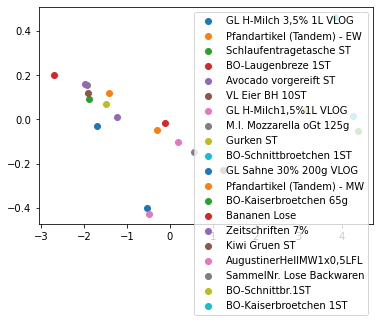

In [8]:
# scatter graph
colors = [i for i in range(0,100,10)]
# cdict = dict(zip(article_list, colors))
# print(cdict)

fig, ax = plt.subplots()
for i in range(len(article_list)):
    ax.scatter(data_pca[i,0], data_pca[i,1], label = article_list[i])
ax.legend()
plt.show()

In [9]:
kmeans_model = KMeans(n_clusters=6)
kmeans_model.fit(data_pca)
labels = kmeans_model.predict(data_pca)
clusters = {}
n = 0
for item in labels:
    if item in clusters:
        clusters[item].append(data_pca[n])
    else:
        clusters[item] = [data_pca[n]]
    n+=1
for item in clusters:
    print("输出簇: ", item)
    for i in clusters[item]:
        print(i)

输出簇:  2
[-0.52717658 -0.39991416]
[-0.10915016 -0.01673391]
[-0.49367422 -0.42962618]
[-0.29320861 -0.04763731]
[ 0.18712025 -0.10253074]
输出簇:  0
[-1.41457706  0.12028908]
[-1.22155726  0.00959521]
[-1.49301463  0.07157532]
[-1.69329191 -0.02794975]
输出簇:  3
[-1.87632028  0.09387079]
[-1.9095385   0.12161063]
[-1.93013642  0.15376791]
[-2.70105803  0.20260241]
[-1.98022038  0.15885955]
输出簇:  1
[4.27495197 0.01693782]
[ 4.38345722 -0.05426167]
[3.85061    0.46467229]
输出簇:  4
[ 1.24214185 -0.22860697]
[ 0.55727163 -0.14835082]
输出簇:  5
[3.14737111 0.04183049]
